In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("city_day.csv")
df

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

In [30]:
df.shape

(29531, 16)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [32]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [33]:
df.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [34]:
df.fillna(df.mean(),inplace = True)
df

City        Date      PM2.5        PM10     NO    NO2    NOx  \
0          Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1          Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2          Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3          Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4          Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   
...              ...         ...        ...         ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.020000   50.940000   7.68  25.06  19.54   
29527  Visakhapatnam  2020-06-28  24.380000   74.090000   3.42  26.06  16.53   
29528  Visakhapatnam  2020-06-29  22.910000   65.730000   3.45  29.53  18.33   
29529  Visakhapatnam  2020-06-30  16.640000   49.970000   4.05  29.26  18.80   
29530  Visakhapatnam  2020-07-01  15.000000   66.000000   0.40  26.85  14.05   

             NH3     CO    SO2      O3  Benzene    Toluene    Xylene  \
0      23.483476   0.92  27.64  133.36  0.00000   0.020000  0.000000   
1      23.483476   0.97  24.55   34.06  3.68000   5.500000  3.770000   
2      23.483476  17.40  29.07   30.70  6.80000  16.400000  2.250000   
3      23.483476   1.70  18.59   36.08  4.43000  10.140000  1.000000   
4      23.483476  22.10  39.33   39.31  7.01000  18.890000  2.780000   
...          ...    ...    ...     ...      ...        ...       ...   
29526  12.470000   0.47   8.55   23.30  2.24000  12.070000  0.730000   
29527  11.990000   0.52  12.72   30.14  0.74000   2.210000  0.380000   
29528  10.710000   0.48   8.42   30.96  0.01000   0.010000  0.000000   
29529  10.030000   0.52   9.84   28.30  0.00000   0.000000  0.000000   
29530   5.200000   0.59   2.10   17.05  3.28084   8.700972  3.070128   

              AQI    AQI_Bucket  
0      166.463581           NaN  
1      166.463581           NaN  
2      166.463581           NaN  
3      166.463581           NaN  
4      166.463581           NaN  
...           ...           ...  
29526   41.000000          Good  
29527   70.000000  Satisfactory  
29528   68.000000  Satisfactory  
29529   54.000000  Satisfactory  
29530   50.000000          Good  

[29531 rows x 16 columns]

In [35]:
df.duplicated().sum()

0

In [36]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [37]:
df.drop("Date",axis = 1,inplace = True)
df.drop("AQI_Bucket",axis = 1, inplace = True)
df

City      PM2.5        PM10     NO    NO2    NOx        NH3  \
0          Ahmedabad  67.450578  118.127103   0.92  18.22  17.15  23.483476   
1          Ahmedabad  67.450578  118.127103   0.97  15.69  16.46  23.483476   
2          Ahmedabad  67.450578  118.127103  17.40  19.30  29.70  23.483476   
3          Ahmedabad  67.450578  118.127103   1.70  18.48  17.97  23.483476   
4          Ahmedabad  67.450578  118.127103  22.10  21.42  37.76  23.483476   
...              ...        ...         ...    ...    ...    ...        ...   
29526  Visakhapatnam  15.020000   50.940000   7.68  25.06  19.54  12.470000   
29527  Visakhapatnam  24.380000   74.090000   3.42  26.06  16.53  11.990000   
29528  Visakhapatnam  22.910000   65.730000   3.45  29.53  18.33  10.710000   
29529  Visakhapatnam  16.640000   49.970000   4.05  29.26  18.80  10.030000   
29530  Visakhapatnam  15.000000   66.000000   0.40  26.85  14.05   5.200000   

          CO    SO2      O3  Benzene    Toluene    Xylene         AQI  
0       0.92  27.64  133.36  0.00000   0.020000  0.000000  166.463581  
1       0.97  24.55   34.06  3.68000   5.500000  3.770000  166.463581  
2      17.40  29.07   30.70  6.80000  16.400000  2.250000  166.463581  
3       1.70  18.59   36.08  4.43000  10.140000  1.000000  166.463581  
4      22.10  39.33   39.31  7.01000  18.890000  2.780000  166.463581  
...      ...    ...     ...      ...        ...       ...         ...  
29526   0.47   8.55   23.30  2.24000  12.070000  0.730000   41.000000  
29527   0.52  12.72   30.14  0.74000   2.210000  0.380000   70.000000  
29528   0.48   8.42   30.96  0.01000   0.010000  0.000000   68.000000  
29529   0.52   9.84   28.30  0.00000   0.000000  0.000000   54.000000  
29530   0.59   2.10   17.05  3.28084   8.700972  3.070128   50.000000  

[29531 rows x 14 columns]

In [38]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

Text(0, 0.5, 'City')

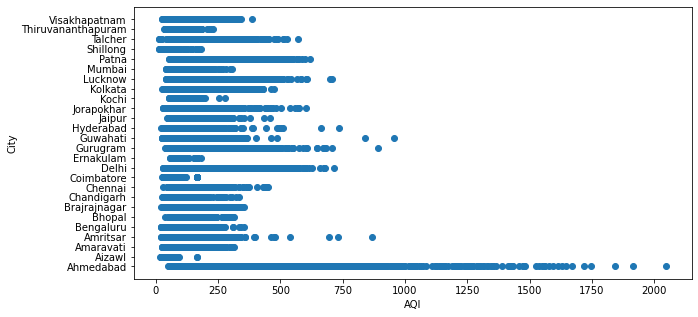

In [43]:
r = df['AQI']
c = df['City']
plt.figure(figsize=(10,5))
plt.scatter(r,c)
plt.xlabel('AQI')
plt.ylabel('City')

In [44]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

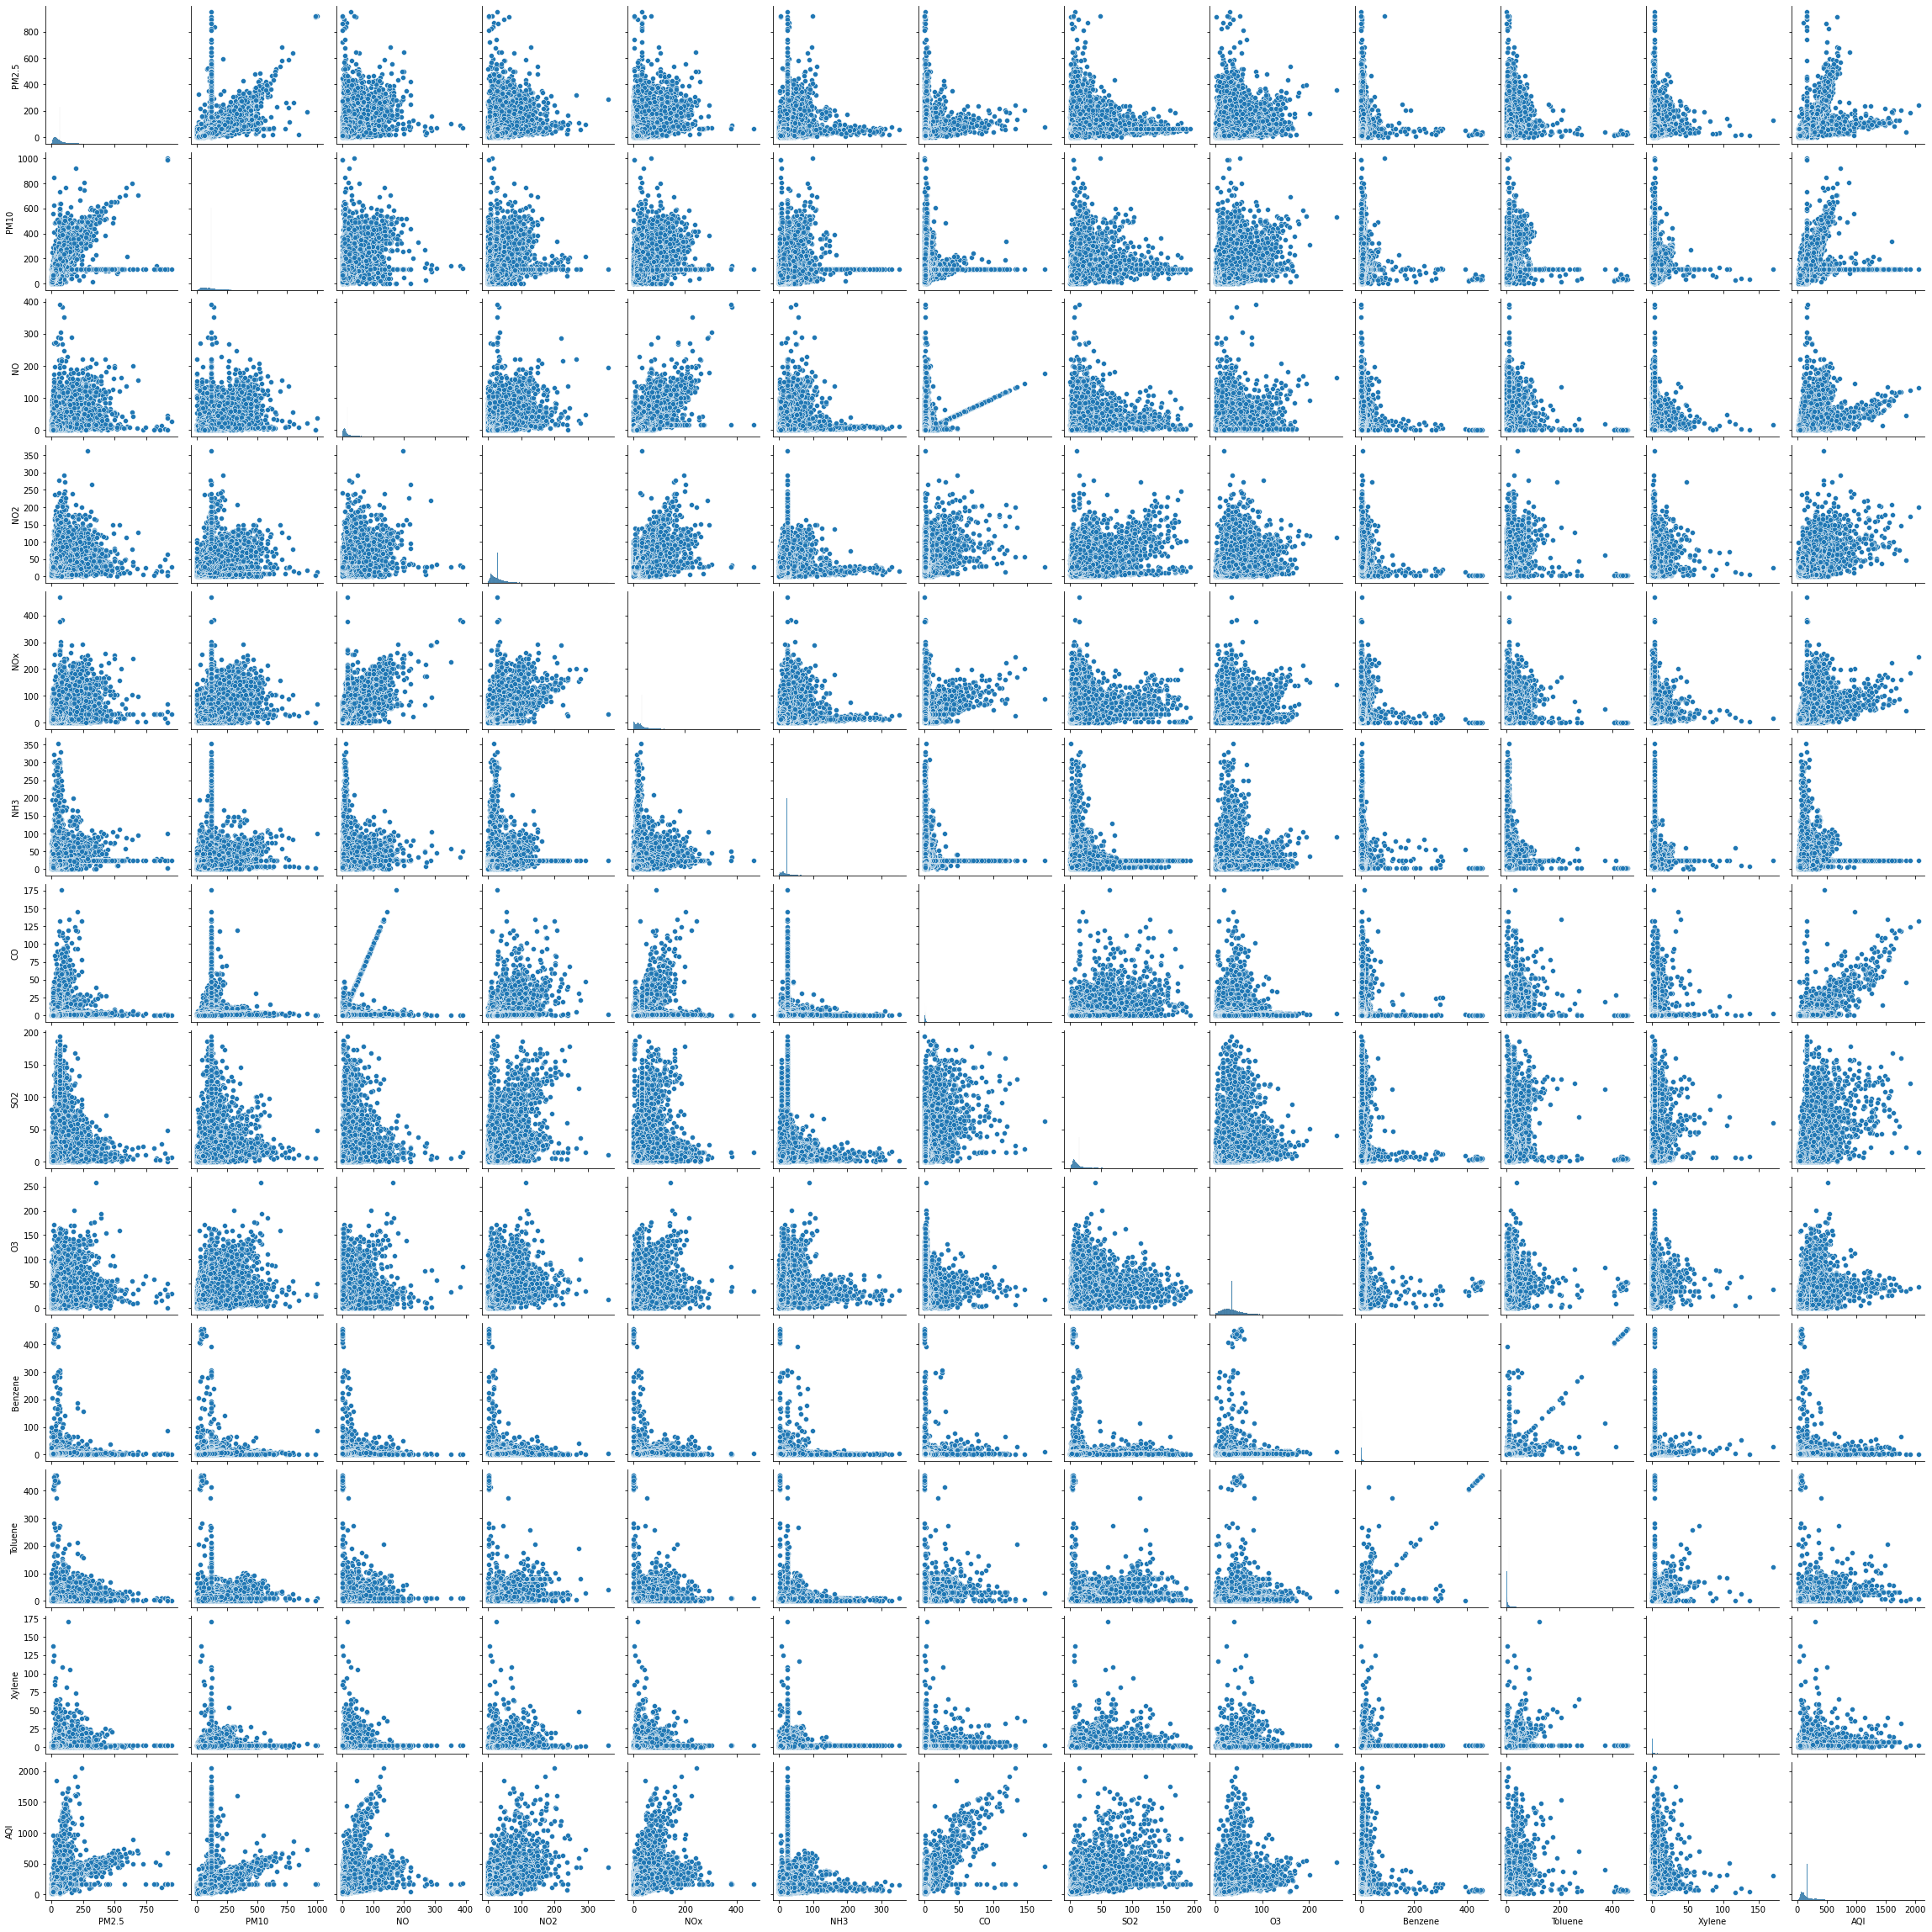

In [14]:
sns.pairplot(df)

<AxesSubplot:>

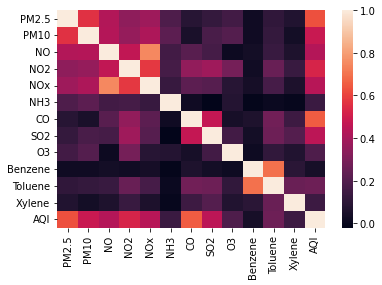

In [15]:
sns.heatmap(df.corr())

In [16]:
le = LabelEncoder()
df['City'] = le.fit_transform(df['City'])
df

City      PM2.5        PM10     NO    NO2    NOx        NH3     CO  \
0         0  67.450578  118.127103   0.92  18.22  17.15  23.483476   0.92   
1         0  67.450578  118.127103   0.97  15.69  16.46  23.483476   0.97   
2         0  67.450578  118.127103  17.40  19.30  29.70  23.483476  17.40   
3         0  67.450578  118.127103   1.70  18.48  17.97  23.483476   1.70   
4         0  67.450578  118.127103  22.10  21.42  37.76  23.483476  22.10   
...     ...        ...         ...    ...    ...    ...        ...    ...   
29526    25  15.020000   50.940000   7.68  25.06  19.54  12.470000   0.47   
29527    25  24.380000   74.090000   3.42  26.06  16.53  11.990000   0.52   
29528    25  22.910000   65.730000   3.45  29.53  18.33  10.710000   0.48   
29529    25  16.640000   49.970000   4.05  29.26  18.80  10.030000   0.52   
29530    25  15.000000   66.000000   0.40  26.85  14.05   5.200000   0.59   

         SO2      O3  Benzene    Toluene    Xylene         AQI  
0      27.64  133.36  0.00000   0.020000  0.000000  166.463581  
1      24.55   34.06  3.68000   5.500000  3.770000  166.463581  
2      29.07   30.70  6.80000  16.400000  2.250000  166.463581  
3      18.59   36.08  4.43000  10.140000  1.000000  166.463581  
4      39.33   39.31  7.01000  18.890000  2.780000  166.463581  
...      ...     ...      ...        ...       ...         ...  
29526   8.55   23.30  2.24000  12.070000  0.730000   41.000000  
29527  12.72   30.14  0.74000   2.210000  0.380000   70.000000  
29528   8.42   30.96  0.01000   0.010000  0.000000   68.000000  
29529   9.84   28.30  0.00000   0.000000  0.000000   54.000000  
29530   2.10   17.05  3.28084   8.700972  3.070128   50.000000  

[29531 rows x 14 columns]

In [17]:
target = df['AQI']
data = df.drop('AQI',axis = 1)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.3,random_state = 50)

In [19]:
from sklearn.metrics import mean_squared_error
   
def train_test_score(m):
    print("\nTraining Score :", m.score(x_train,y_train))
    print("\nTesting Score :", m.score(x_test,y_test))

# Model 1 - Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()
m1.fit(x_train,y_train)
ypred_m1 = m1.predict(x_test)
data1 = pd.DataFrame({'ytest': y_test,'ypred': ypred_m1})
data1.head()

ytest       ypred
5778   130.0  132.958878
9032    63.0  115.764991
1398   509.0  464.024951
28781  105.0  134.149545
14501  200.0  195.380879

In [21]:
train_test_score(m1)


Training Score : 0.7981407782157239

Testing Score : 0.7823373690536904


# Model 2 - Decision Tree Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor

m2 = DecisionTreeRegressor()
m2.fit(x_train,y_train)
ypred_m2 = m2.predict(x_test)
data2 = pd.DataFrame({'ytest': y_test,'ypred': ypred_m2})
data2.head()

ytest  ypred
5778   130.0  101.0
9032    63.0  107.0
1398   509.0  458.0
28781  105.0  117.0
14501  200.0  231.0

In [23]:
train_test_score(m2)


Training Score : 0.9991532900439939

Testing Score : 0.7625634091933193


# Model 3 - Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor

m3 = RandomForestRegressor()
m3.fit(x_train,y_train)
ypred_m3 = m3.predict(x_test)
data3 = pd.DataFrame({'ytest': y_test,'ypred': ypred_m3})
data3.head()

ytest       ypred
5778   130.0  116.963907
9032    63.0   90.799272
1398   509.0  622.599272
28781  105.0  117.130000
14501  200.0  240.314636

In [25]:
train_test_score(m3)


Training Score : 0.9811073502865973

Testing Score : 0.8762992604828692
